In [563]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams
%matplotlib inline
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

In [564]:
#load & view raw data
df = pd.read_csv('fraud_insurance_file.csv')
print('VIEWING DATA :=')
df.head(1000)

VIEWING DATA :=


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [565]:
print("SHAPE := ",df.shape)

SHAPE :=  (1000, 39)


In [566]:
print('CHECK NULL VALUES IN EACH COLUMNS \n')
print(df.isnull().sum()) #check missing value

CHECK NULL VALUES IN EACH COLUMNS 

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witness

In [567]:
print('TOTAL TYPES OF EACH FEATURE IN DATASET :=')
df.nunique()

TOTAL TYPES OF EACH FEATURE IN DATASET :=


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [568]:
print("FEATURE DESCRIPTION OF DATASET :=")
df.columns

FEATURE DESCRIPTION OF DATASET :=


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [569]:
print("DATA TYPES OF ALL FEATURES IN DATASET :=")
df.dtypes

DATA TYPES OF ALL FEATURES IN DATASET :=


months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [570]:
yes=sum(df['fraud_reported']=='Y')
no=sum(df['fraud_reported']=='N')
print('TOTAL FRAUD REPORTED ')
print('TOTAL TURE FRAUD :=',yes)
print('TOTAL FALSE FRAUD :=',no)

TOTAL FRAUD REPORTED 
TOTAL TURE FRAUD := 247
TOTAL FALSE FRAUD := 753


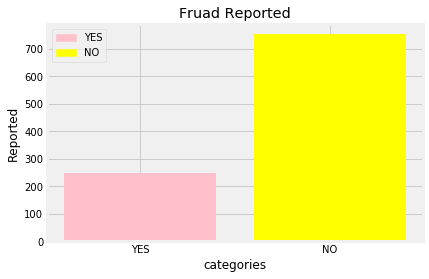

In [571]:
categories=['YES','NO']
reported=[yes,no]
plt.bar(categories,reported,color=['pink','yellow'])
plt.xlabel('categories')
plt.ylabel('Reported')
plt.title('Fruad Reported')

colors = {'YES':'pink', 'NO':'yellow'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()


In [572]:
incident_state1=df['incident_state']
incident_state2={}
for i in incident_state1:
    if i not in incident_state2:
        incident_state2[i]=1
    else:
        incident_state2[i]=incident_state2[i]+1
incident_state2={k: v for k, v in sorted(incident_state2.items(), key=lambda item: item[1])}
print('NUMBER OF INCIDENT STATE ')
for i in incident_state2:
    print(i,':=:',incident_state2[i])


NUMBER OF INCIDENT STATE 
OH :=: 23
PA :=: 30
VA :=: 110
NC :=: 110
WV :=: 217
SC :=: 248
NY :=: 262


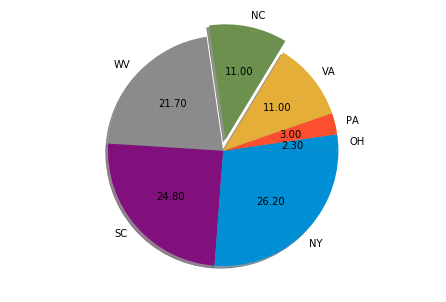

In [573]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
incident_state_type = incident_state2.keys()
incident_state_number = incident_state2.values()
ax.pie(incident_state_number, labels = incident_state_type,explode=(0,0,0,0.1,0,0,0),autopct='%.2f',shadow=True)
plt.show()

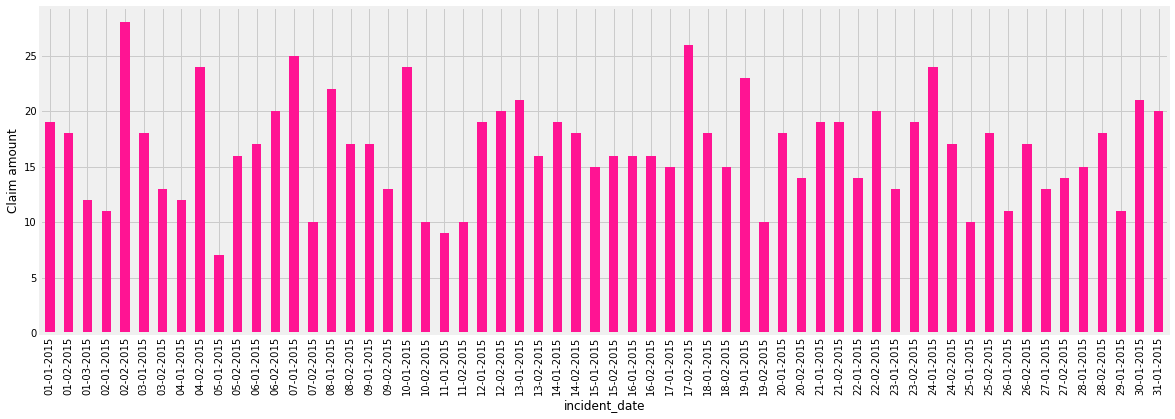

In [574]:
#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0,color=['deeppink'])
ax.set_ylabel('Claim amount')
plt.show()

In [575]:

policy_state1=df['policy_state']
policy_state2={}
for i in policy_state1:
    if i not in policy_state2:
        policy_state2[i]=1
    else:
        policy_state2[i]=policy_state2[i]+1
policy_state2={k: v for k, v in sorted(policy_state2.items(), key=lambda item: item[1])}
print('NUMBER OF POLICY STATE ')
for i in policy_state2:
    print(i,':=:',policy_state2[i])


NUMBER OF POLICY STATE 
IN :=: 310
IL :=: 338
OH :=: 352


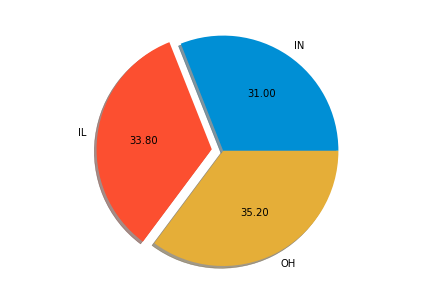

In [576]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

policy_state_type =policy_state2.keys()
policy_state_number = policy_state2.values()

ax.pie(policy_state_number, labels = policy_state_type,explode=(0,0.1,0),autopct='%.2f',shadow=True)
plt.show()

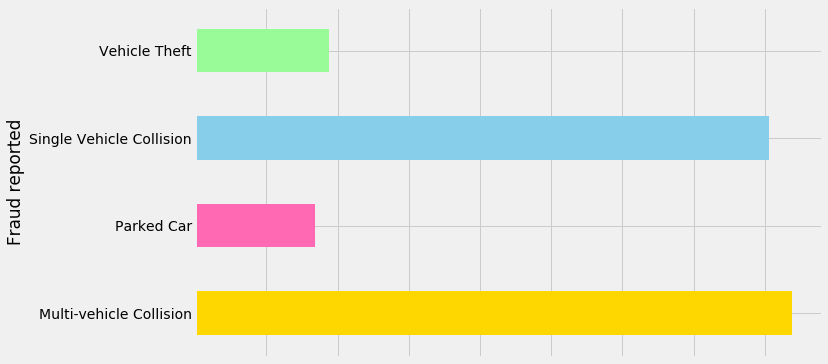

In [577]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.barh(ylim=0,color=['gold','hotpink','skyblue','palegreen'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [578]:
insured_relationship1=df['insured_relationship']
insured_relationship2={}
for i in insured_relationship1:
    if i not in insured_relationship2:
        insured_relationship2[i] = 1
    else:
        insured_relationship2[i]=insured_relationship2[i]+1
insured_relationship2={k: v for k, v in sorted(insured_relationship2.items(), key=lambda item: item[1])}
print('TOTAL NUMBER OF RELATION OF EACH TYPES OF RELATIONSHIP FOR INSURANCE ')
for i in insured_relationship2:
    print(i,':=:',insured_relationship2[i])

TOTAL NUMBER OF RELATION OF EACH TYPES OF RELATIONSHIP FOR INSURANCE 
unmarried :=: 141
wife :=: 155
husband :=: 170
not-in-family :=: 174
other-relative :=: 177
own-child :=: 183


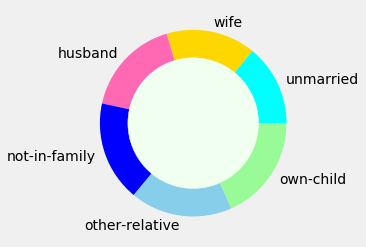

In [579]:
insured_relationship_type= insured_relationship2.keys()
insured_relationship_size=insured_relationship2.values()
color=['cyan','gold','hotpink','blue','skyblue','palegreen']

my_circle=plt.Circle( (0,0), 0.7, color='honeydew')
plt.pie(insured_relationship_size, labels=insured_relationship_type, colors=color)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

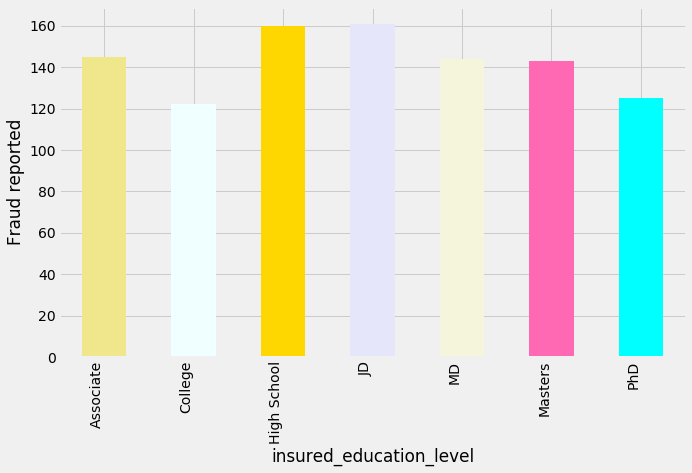

In [580]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_education_level').fraud_reported.count().plot.bar(ylim=0,color=['khaki','azure','gold','lavender','beige','hotpink','cyan'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [581]:
male=sum(df['insured_sex']=='MALE')
female=sum(df['insured_sex']=='FEMALE')
print('TOTAL NUMBER OF MALE AND FEMALE IN FRAUD DETECTION')
print('TOTAL MALE :=',male)
print('TOTAL FEMAL :=',female)

TOTAL NUMBER OF MALE AND FEMALE IN FRAUD DETECTION
TOTAL MALE := 463
TOTAL FEMAL := 537


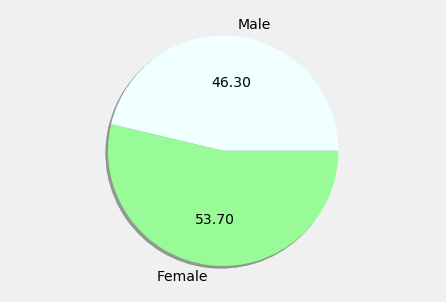

In [582]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
gender_label = ['Male','Female']
gender_value = [male,female] 
ax.pie(gender_value, labels = gender_label,explode=(0,0),autopct='%.2f',shadow=True,colors=['azure','palegreen'])
plt.show()

In [583]:
authorities_contacted1=df['authorities_contacted']
authorities_contacted2={}
for i in authorities_contacted1:
    if i not in authorities_contacted2:
        authorities_contacted2[i] = 1
    else:
        authorities_contacted2[i]=authorities_contacted2[i]+1
authorities_contacted2={k: v for k, v in sorted(authorities_contacted2.items(), key=lambda item: item[1])}
print('DIFFERENT TYPES OF HIGHER AUTHORITIES CONNECTED WITH FRAUD CASES')
for i in authorities_contacted2:
    print(i,':=:',authorities_contacted2[i])


DIFFERENT TYPES OF HIGHER AUTHORITIES CONNECTED WITH FRAUD CASES
None :=: 91
Ambulance :=: 196
Other :=: 198
Fire :=: 223
Police :=: 292


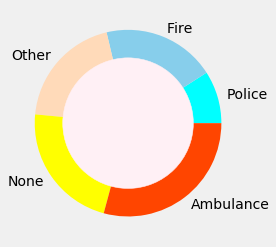

In [584]:
authorities_labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance']
authorities_contacted_size=authorities_contacted2.values()
color=['cyan','skyblue','peachpuff','yellow','orangered']

my_circle=plt.Circle( (0,0), 0.7, color='lavenderblush')
plt.pie(authorities_contacted_size, labels=authorities_labels, colors=color)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [585]:
auto_types=list(df['auto_make'].unique())

auto_types_size=[]
for i in auto_types:
    auto_types_size.append(sum(df['auto_make']==i))

print('TYPES OF VEHICLE INVOLVED IN FRAUD ')
for i,j in zip(auto_types,auto_types_size):
    print(i ,' :=: ',  j)

TYPES OF VEHICLE INVOLVED IN FRAUD 
Saab  :=:  80
Mercedes  :=:  65
Dodge  :=:  80
Chevrolet  :=:  76
Accura  :=:  68
Nissan  :=:  78
Audi  :=:  69
Toyota  :=:  70
Ford  :=:  72
Suburu  :=:  80
BMW  :=:  72
Jeep  :=:  67
Honda  :=:  55
Volkswagen  :=:  68


c:\users\ashok\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


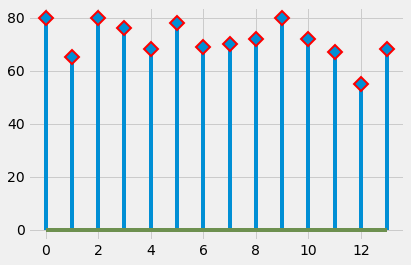

In [586]:
# change color and shape and size and edges
(markers, stemlines, baseline) = plt.stem(auto_types_size)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="red", markeredgewidth=2)
plt.show()

In [587]:
incident_severity1 = {}
for i in df['incident_severity']:
    
    if i not in incident_severity1:
        incident_severity1[i]=1
    else:
        incident_severity1[i]=incident_severity1[i]+1

print('TYPES OF DAMAGES ON VEHICLES')
for i in incident_severity1:
    print(i,' :=: ',incident_severity1[i])


TYPES OF DAMAGES ON VEHICLES
Major Damage  :=:  276
Minor Damage  :=:  354
Total Loss  :=:  280
Trivial Damage  :=:  90


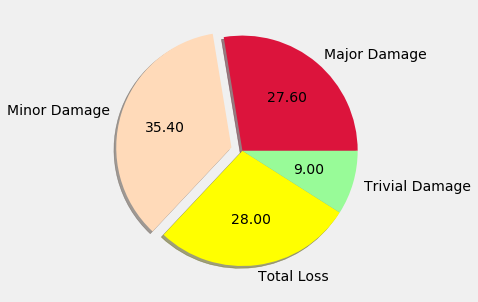

In [588]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
incident_severity_label = list(incident_severity1.keys())
incident_severity_size = list(incident_severity1.values())
ax.pie(incident_severity_size, labels = incident_severity_label,explode=(0,0.1,0,0),autopct='%.2f',shadow=True,colors=['crimson','peachpuff','yellow','palegreen'])
plt.show()

In [589]:
insured_hobbies1 = {}
for i in df['insured_hobbies']:
    
    if i not in insured_hobbies1:
        insured_hobbies1[i]=1
    else:
        insured_hobbies1[i]=insured_hobbies1[i]+1

print('HOBBIES OF PEOPLE INVOLVED IN FRAUD CASE')
for i in insured_hobbies1:
    print(i,' :=: ',insured_hobbies1[i])


HOBBIES OF PEOPLE INVOLVED IN FRAUD CASE
sleeping  :=:  41
reading  :=:  64
board-games  :=:  48
bungie-jumping  :=:  56
base-jumping  :=:  49
golf  :=:  55
camping  :=:  55
dancing  :=:  43
skydiving  :=:  49
movies  :=:  55
hiking  :=:  52
yachting  :=:  53
paintball  :=:  57
chess  :=:  46
kayaking  :=:  54
polo  :=:  47
basketball  :=:  34
video-games  :=:  50
cross-fit  :=:  35
exercise  :=:  57


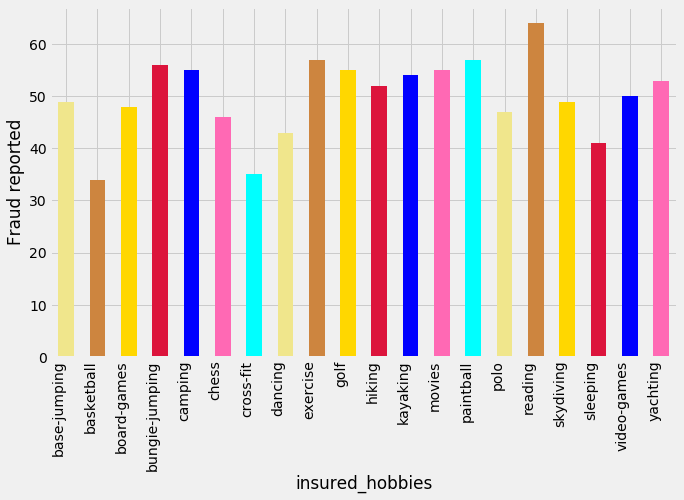

In [590]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_hobbies').fraud_reported.count().plot.bar(ylim=0,color=['khaki','peru','gold','crimson','blue','hotpink','cyan'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [591]:
print('OCCUPATION OF PEOPLE INVOLVED IN FRAUD CASE')
df["insured_occupation"].value_counts()

OCCUPATION OF PEOPLE INVOLVED IN FRAUD CASE


machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

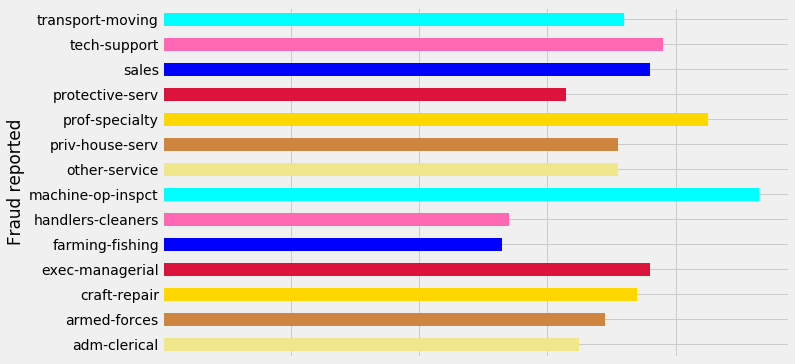

In [592]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_occupation').fraud_reported.count().plot.barh(ylim=0,color=['khaki','peru','gold','crimson','blue','hotpink','cyan'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

In [593]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [594]:
print('check the spread of years to decide on further action')
df['auto_year'].value_counts()  

check the spread of years to decide on further action


1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [595]:
df['vehicle_age'] = 2018 - df['auto_year']  
print('Deriving the age of the vehicle based on the year value')
df['vehicle_age']

Deriving the age of the vehicle based on the year value


0      14
1      11
2      11
3       4
4       9
       ..
995    12
996     3
997    22
998    20
999    11
Name: vehicle_age, Length: 1000, dtype: int64

In [596]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,14
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,11
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,11
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,4
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,9


In [597]:
#load & view raw data
df1 = pd.read_csv('fraud_insurance_file2.csv')
print('VIEWING DATA :=')
df1.head(1000)

VIEWING DATA :=


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,53300,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,0,...,?,0,0,?,5070,780,780,3510,2007,Y
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,35100,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,48900,...,?,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,66000,...,NO,0,1,NO,6500,1300,650,4550,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,1000,1310.80,0,431289,FEMALE,0,...,YES,0,1,?,87200,17440,8720,61040,2006,N
996,285,41,186934,IL,1000,1436.79,0,608177,FEMALE,70900,...,YES,2,3,?,108480,18080,18080,72320,2015,N
997,130,34,918516,OH,500,1383.49,3000000,442797,FEMALE,35100,...,?,2,3,YES,67500,7500,7500,52500,1996,N
998,458,62,533940,IL,2000,1356.92,5000000,441714,MALE,0,...,?,0,1,YES,46980,5220,5220,36540,1998,N


In [598]:

df1['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df1['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)
print('HERE WE ARE CHANGING THE DATA TYPE OF OUR TARGET FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF OUR TARGET FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,53300,...,YES,1,2,YES,71610,6510,13020,52080,2004,1
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,0,...,?,0,0,?,5070,780,780,3510,2007,1
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,35100,...,NO,2,3,NO,34650,7700,3850,23100,2007,0
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,48900,...,?,1,2,NO,63400,6340,6340,50720,2014,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,66000,...,NO,0,1,NO,6500,1300,650,4550,2009,0


In [599]:
df1['property_damage'].replace(to_replace='YES', value=1, inplace=True)
df1['property_damage'].replace(to_replace='NO',  value=0, inplace=True)
df1['property_damage'].replace(to_replace='?', value=0.5, inplace=True)
print('HERE WE ARE CHANGING THE DATA TYPE OF DAMAGE PROPERTY COLUMNS FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF DAMAGE PROPERTY COLUMNS FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,53300,...,1.0,1,2,YES,71610,6510,13020,52080,2004,1
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,0,...,0.5,0,0,?,5070,780,780,3510,2007,1
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,35100,...,0.0,2,3,NO,34650,7700,3850,23100,2007,0
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,48900,...,0.5,1,2,NO,63400,6340,6340,50720,2014,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,66000,...,0.0,0,1,NO,6500,1300,650,4550,2009,0


In [600]:
df1['police_report_available'].replace(to_replace='?',  value=0.5, inplace=True)
df1['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
df1['police_report_available'].replace(to_replace='NO',  value=0, inplace=True)

print('HERE WE ARE CHANGING THE DATA TYPE OF POLICE REPORT COLUMNS FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF POLICE REPORT COLUMNS FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [601]:
df1['policy_state'].unique()
df1['policy_state'].replace(to_replace='OH',  value=0, inplace=True)
df1['policy_state'].replace(to_replace='IN', value=1, inplace=True)
df1['policy_state'].replace(to_replace='IL',  value=2, inplace=True)

print('HERE WE ARE CHANGING THE DATA TYPE OF POLICY STATE FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF POLICY STATE FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,0,1000,1406.91,0,466132,MALE,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,MALE,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,0,2000,1413.14,5000000,430632,FEMALE,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,2000,1415.74,6000000,608117,FEMALE,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,1000,1583.91,6000000,610706,MALE,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [602]:
df1['insured_sex'].unique()
df1['insured_sex'].replace(to_replace='MALE',  value=1, inplace=True)
df1['insured_sex'].replace(to_replace='FEMALE', value=0, inplace=True)

print('HERE WE ARE CHANGING THE DATA TYPE OF INSURED SEX FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF INSURED SEX FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,0,1000,1406.91,0,466132,1,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,0,2000,1413.14,5000000,430632,0,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,2000,1415.74,6000000,608117,0,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,1000,1583.91,6000000,610706,1,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [603]:
df1['incident_type'].unique()

df1['incident_type'].replace(to_replace='Single Vehicle Collision',  value=0, inplace=True)
df1['incident_type'].replace(to_replace='Vehicle Theft',  value=1, inplace=True)
df1['incident_type'].replace(to_replace='Multi-vehicle Collision',  value=2, inplace=True)
df1['incident_type'].replace(to_replace='Parked Car',  value=3, inplace=True)

print('HERE WE ARE CHANGING THE DATA TYPE OF INCIDENT TYPE FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF INCIDENT TYPE FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,0,1000,1406.91,0,466132,1,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,0,2000,1413.14,5000000,430632,0,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,2000,1415.74,6000000,608117,0,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,1000,1583.91,6000000,610706,1,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [604]:
df1['collision_type'].unique()

df1['collision_type'].replace(to_replace='Side Collision',  value=0, inplace=True)
df1['collision_type'].replace(to_replace='Rear Collision',  value=1, inplace=True)
df1['collision_type'].replace(to_replace='Front Collision',  value=2, inplace=True)
df1['collision_type'].replace(to_replace='?',  value=3, inplace=True)


print('HERE WE ARE CHANGING THE DATA TYPE OF COLLISION TYPE FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF COLLISION TYPE FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,0,1000,1406.91,0,466132,1,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,0,2000,1413.14,5000000,430632,0,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,2000,1415.74,6000000,608117,0,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,1000,1583.91,6000000,610706,1,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [605]:
df1['incident_state'].unique()
df1['incident_state'].replace(to_replace='SC',  value=0, inplace=True)
df1['incident_state'].replace(to_replace='VA',  value=1, inplace=True)
df1['incident_state'].replace(to_replace='NY',  value=2, inplace=True)
df1['incident_state'].replace(to_replace='OH',  value=3, inplace=True)
df1['incident_state'].replace(to_replace='WV',  value=4, inplace=True)
df1['incident_state'].replace(to_replace='NC',  value=5, inplace=True)
df1['incident_state'].replace(to_replace='PA',  value=6, inplace=True)


print('HERE WE ARE CHANGING THE DATA TYPE OF INCIDENT STATE FROM STRING TO INTEGER')
df1.head()

HERE WE ARE CHANGING THE DATA TYPE OF INCIDENT STATE FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,0,1000,1406.91,0,466132,1,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,0,2000,1413.14,5000000,430632,0,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,2000,1415.74,6000000,608117,0,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,1000,1583.91,6000000,610706,1,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [606]:
df1['authorities_contacted'].unique()
df1['authorities_contacted'].replace(to_replace='Police',  value=0, inplace=True)
df1['authorities_contacted'].replace(to_replace='None',  value=1, inplace=True)
df1['authorities_contacted'].replace(to_replace='Fire',  value=2, inplace=True)
df1['authorities_contacted'].replace(to_replace='Other',  value=3, inplace=True)
df1['authorities_contacted'].replace(to_replace='Ambulance',  value=4, inplace=True)

print('HERE WE ARE CHANGING THE DATA TYPE OF AUTHORITIES CONTACTED FROM STRING TO INTEGER')
df1.head()


HERE WE ARE CHANGING THE DATA TYPE OF AUTHORITIES CONTACTED FROM STRING TO INTEGER


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,0,1000,1406.91,0,466132,1,53300,...,1.0,1,2,1.0,71610,6510,13020,52080,2004,1
1,228,42,342868,1,2000,1197.22,5000000,468176,1,0,...,0.5,0,0,0.5,5070,780,780,3510,2007,1
2,134,29,687698,0,2000,1413.14,5000000,430632,0,35100,...,0.0,2,3,0.0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,2000,1415.74,6000000,608117,0,48900,...,0.5,1,2,0.0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,1000,1583.91,6000000,610706,1,66000,...,0.0,0,1,0.0,6500,1300,650,4550,2009,0


In [607]:
x=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [608]:
#standardzation
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
x_std=se.fit_transform(x)
print('============STANDARD SCALER==========\n')
print(x_std,'\n')

#normalization

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_norm=mms.fit_transform(x)
print('===========NORMALIZATON==============\n')
print(x_norm,'\n')

============STANDARD SCALER==========

[[ 1.07813958  0.99083647 -0.09595307 ...  1.16550497  0.74965272
  -0.1834404 ]
 [ 0.2089946   0.33407345 -0.79152739 ... -1.37269599 -1.82334593
   0.31549088]
 [-0.60800168 -1.08891308  0.55056594 ... -0.73607206 -0.78556451
   0.31549088]
 ...
 [-0.64276748 -0.54161057  1.44891961 ...  0.0208261   0.77190224
  -1.5139238 ]
 [ 2.20802805  2.52328351 -0.04786687 ... -0.45197603 -0.07357971
  -1.18130295]
 [ 2.19064515  2.3043625   0.03830297 ... -1.34366428 -1.81434017
   0.31549088]] 

===========NORMALIZATON==============

[[0.68475992 0.64444444 0.4682467  ... 0.55006337 0.65429614 0.45      ]
 [0.47599165 0.51111111 0.26936974 ... 0.03295311 0.04327588 0.6       ]
 [0.27974948 0.22222222 0.65309788 ... 0.16265315 0.28972198 0.6       ]
 ...
 [0.27139875 0.33333333 0.90995303 ... 0.31685678 0.65957982 0.05      ]
 [0.95615866 0.95555556 0.48199539 ... 0.22053232 0.45879985 0.15      ]
 [0.9519833  0.91111111 0.50663287 ... 0.03886777 0.045414

In [609]:
#TESTING AND TRAINING OF DATA 
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x_norm,Y,test_size=0.05,random_state=1)
print('===========SHAPE OF TRAINING DATA==============\n')
print(x_train.shape,'\n')
print('===========SHAPE OF TESTINING DATA=============\n')
print(x_test.shape,'\n')

===========SHAPE OF TRAINING DATA==============

(950, 26) 

===========SHAPE OF TESTINING DATA=============

(50, 26) 



In [610]:
print('\n===============K-Nearest Neighbors=====================')

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,random_state=0)
forest.fit(x_train,y_train)
train_pred=forest.predict(x_train)
test_pred=forest.predict(x_test)

from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test,y_pred)
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)

print('Training Accuracy of K-Nearest Neighbors: ', test_acc*100)
print('Testing Accuracy of K-Nearest Neighbors: ', test_acc*100)


print('\n==============Logistic Regression======================')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1,penalty='l2')
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)
print('Training Accuracy of Logistic Regression: ', train_acc*100)
print('Testing Accuracy of Logistic Regression: ', test_acc*100)


print('\n=================Perceptron===========================')
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1)
ppn.fit(x_train,y_train)
train_pred=ppn.predict(x_train)
test_pred=ppn.predict(x_test)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,train_pred)
test_acc = accuracy_score(y_test,test_pred)
print('Training Accuracy of Perceptron: ', train_acc*100)
print('Testing Accuracy of Perceptron: ', test_acc*100)
print('Train Misclassified Sample : ', (y_train!=train_pred).sum())
print('Test Misclassified Sample : ', (y_test!=test_pred).sum())


print('\n================Classfication Report Of Our Dataset=================')

from sklearn.metrics import classification_report
cf = classification_report(y_test,test_pred)
print(cf)

print('\n===================Confusion Matrix=================')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_pred)

print(cm)


===============K-Nearest Neighbors=====================
Training Accuracy of K-Nearest Neighbors:  76.0
Testing Accuracy of K-Nearest Neighbors:  76.0

==============Logistic Regression======================
Training Accuracy of Logistic Regression:  75.05263157894737
Testing Accuracy of Logistic Regression:  76.0

=================Perceptron===========================
Training Accuracy of Perceptron:  74.94736842105263
Testing Accuracy of Perceptron:  74.0
Train Misclassified Sample :  238
Test Misclassified Sample :  13

================Classfication Report Of Our Dataset=================
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        38
           1       0.00      0.00      0.00        12

    accuracy                           0.74        50
   macro avg       0.38      0.49      0.43        50
weighted avg       0.57      0.74      0.65        50


===================Confusion Matrix=================
[[37  1]
 [12  0]]
